# Preparation 

In [1]:
import rootutils
import os
from biopandas.pdb import PandasPdb
from omegaconf import DictConfig, open_dict

rootutils.setup_root(os.getcwd(), indicator=".project-root", pythonpath=True)

from cogligandbench.utils.data_utils import (
    extract_protein_and_ligands_with_prody,
    parse_inference_inputs_from_dir,
)

/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/prody/utilities/misctools.py:424: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pkg_resources/__init__.py:2825: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pkg_resources/__init__.py:2825: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('zope')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/l

# Test case: 1afb

In [68]:
data_dir = "data/plinder_set_0/"
pred_protein = "/home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_1afb__1__1.A__1.D_1.F/predictions/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_model_0.pdb"
ref_protein_path = "/home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_protein.pdb"
ref_ligand_path = "/home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_ligand.sdf"

@> 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 20:37:34,158] {logger.py:135} DEBUG - 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


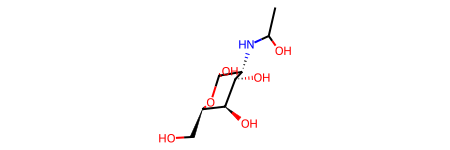

In [69]:
tmp_dir = "/tmp"
extract_protein_and_ligands_with_prody(
    input_pdb_file=pred_protein,
    protein_output_pdb_file=os.path.join(tmp_dir, "pred_protein.pdb"),
    ligands_output_sdf_file=os.path.join(tmp_dir, "pred_ligands.sdf"),
)

In [70]:
from cogligandbench.analysis.complex_alignment import (
    save_aligned_complex,
)

In [71]:
assert os.path.exists(ref_ligand_path)
assert os.path.exists(ref_protein_path)

In [ ]:
save_aligned_complex(
    predicted_protein_pdb=os.path.join(tmp_dir, "pred_protein.pdb"),
    predicted_ligand_sdf=os.path.join(tmp_dir, "pred_ligands.sdf"),
    reference_protein_pdb=ref_protein_path,
    reference_ligand_sdf=ref_ligand_path,
)

In [73]:
from posebusters.posebusters import PoseBusters
pb = PoseBusters(config="redock", top_n=None)
pb.bust(
        mol_pred="/tmp/pred_ligands_aligned.sdf",
        mol_true=ref_ligand_path,
        mol_cond=ref_protein_path,
        full_report=True
) 

/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,most_extreme_sum_radii_scaled_waters,most_extreme_relative_distance_waters,most_extreme_clash_waters,volume_overlap_protein,volume_overlap_organic_cofactors,volume_overlap_inorganic_cofactors,volume_overlap_waters,rmsd,kabsch_rmsd,centroid_distance
file,molecule,,,,,,,,,,,,,,,,,,,,,
/tmp/pred_ligands_aligned.sdf,mol_at_pos_0,True,True,True,True,True,False,True,True,False,True,...,3.25,1.262752,False,0.028556,NaN,NaN,NaN,NaN,NaN,0.383036


In [77]:
import os
import numpy as np
from prody import parsePDB
from rdkit import Chem
from rdkit.Chem import AllChem

# compute protein RMSD (CA atoms only)
pred_prot = parsePDB(os.path.join(tmp_dir, "pred_protein.pdb"))
ref_prot = parsePDB(ref_protein_path)
pred_ca = pred_prot.select("name CA")
ref_ca = ref_prot.select("name CA")
diffs = pred_ca.getCoords() - ref_ca.getCoords()
rmsd_protein = np.sqrt((diffs**2).sum(axis=1).mean())

# compute ligand RMSD
pred_lig_path = os.path.join(tmp_dir, "pred_ligands_aligned.sdf")
pred_lig = Chem.SDMolSupplier(pred_lig_path, removeHs=False)[0]
ref_lig = Chem.SDMolSupplier(ref_ligand_path, removeHs=False)[0]
if ref_lig.GetNumConformers() == 0:
    AllChem.EmbedMolecule(ref_lig)
rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)

print(f"Protein RMSD (CA): {rmsd_protein:.3f} Å")
try:
    rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)
    print(f"Ligand RMSD: {rmsd_ligand:.3f} Å")
except RuntimeError:
    print("Ligand RMSD: could not be computed (no substructure match)")

@> 1192 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 20:37:56,571] {logger.py:135} DEBUG - 1192 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 1194 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 20:37:56,576] {logger.py:135} DEBUG - 1194 atoms and 1 coordinate set(s) were parsed in 0.00s.


RuntimeError: No sub-structure match found between the reference and probe mol

In [75]:
from rdkit.Chem import AllChem

# Method 1: Using AllChem.GetBestRMS
try:
    rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)
    print("Ligand RMSD (Method 1):", f"{rmsd_ligand:.3f} Å")
except Exception:
    print("Ligand RMSD (Method 1): could not be computed (no match)")

# Method 2: Directly compute RMSD from conformer coordinates
try:
    pred_conf = pred_lig.GetConformer()
    ref_conf = ref_lig.GetConformer()
    pred_coords = np.array(pred_conf.GetPositions())
    ref_coords = np.array(ref_conf.GetPositions())
    rmsd = np.sqrt(np.mean(np.sum((pred_coords - ref_coords)**2, axis=1)))
    print("Ligand RMSD (Method 2):", f"{rmsd:.3f} Å")
except Exception:
    print("Ligand RMSD (Method 2): could not be computed (no match)")


Ligand RMSD (Method 1): could not be computed (no match)
Ligand RMSD (Method 2): 3.999 Å


In [76]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms

# Load the predicted and reference protein structures
u_pred = mda.Universe(f"{tmp_dir}/pred_protein.pdb")
u_ref  = mda.Universe(ref_protein_path)

# Select CA atoms from both structures
sel_pred = u_pred.select_atoms("name CA")
sel_ref  = u_ref.select_atoms("name CA")

# Compute the RMSD between the two selections
rms_obj = rms.RMSD(sel_pred, sel_ref)
rms_obj.run()
print("Protein CA RMSD:", rms_obj.rmsd[-1, -1])


Protein CA RMSD: 7.288222795223699


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:754: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.time
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


# Extract the ligand and align in each case

In [12]:
os.getcwd()

'/home/aoxu/projects/PoseBench/forks/boltz'

In [14]:
from pathlib import Path
data_dir = Path.cwd().parent.parent / "data" / "plinder_set"
pred_dir = Path.cwd() / "inference" / "plinder_set_0"
print(
    f"Data directory: {data_dir}\n"
    f"Prediction directory: {pred_dir}"
)


Data directory: /home/aoxu/projects/PoseBench/data/plinder_set
Prediction directory: /home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0


In [ ]:

# Get all prediction directories
pred_subdirs = [d for d in os.listdir(pred_dir) if os.path.isdir(os.path.join(pred_dir, d)) and d.startswith("boltz_results_")]

for subdir in pred_subdirs:
    # Extract complex ID from directory name (e.g., "boltz_results_1afb__1__1.A__1.D_1.F" -> "1afb__1__1.A__1.D_1.F")
    complex_id = subdir.replace("boltz_results_", "")
    

    # Define paths
    pred_pdb_path = os.path.join(pred_dir, subdir, "predictions", complex_id, f"{complex_id}_model_0.pdb")
    ref_protein_path = os.path.join(data_dir, complex_id, f"{complex_id}_protein.pdb")
    ref_ligand_path = os.path.join(data_dir, complex_id, f"{complex_id}_ligand.sdf")
    
    # Create output directory for this complex
    output_dir = os.path.join(pred_dir, subdir, "predictions", complex_id)
    
    # Check if all required files exist
    if not all(os.path.exists(path) for path in [pred_pdb_path, ref_protein_path, ref_ligand_path]):
        print(f"Skipping {complex_id}: missing files")
        continue
    
    print(f"Processing {complex_id}...")
    
    # Extract protein and ligands from prediction
    extract_protein_and_ligands_with_prody(
        input_pdb_file=pred_pdb_path,
        protein_output_pdb_file=os.path.join(output_dir, f"{complex_id}_extracted_protein.pdb"),
        ligands_output_sdf_file=os.path.join(output_dir, f"{complex_id}_extracted_ligands.sdf"),
    )
    
    # Save aligned complex
    save_aligned_complex(
        predicted_protein_pdb=os.path.join(output_dir, f"{complex_id}_aligned_protein.pdb"),
        predicted_ligand_sdf=os.path.join(output_dir, f"{complex_id}_aligned_ligands.sdf"),
        reference_protein_pdb=ref_protein_path,
        reference_ligand_sdf=ref_ligand_path,
    )

Processing 2xtk__2__1.B__1.L...
